In [13]:
from matplotlib import pyplot as plt
import numpy as np

import os
from PIL import Image
import tensorflow as tf
import keras

from keras import layers
from tensorflow.python.keras.layers import InputLayer, Dense, Flatten
from tensorflow.python.keras.models import Sequential
from keras.optimizers import Adam

import pathlib

In [3]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [4]:
print(data_dir)

C:\Users\dell 5420\.keras\datasets\flower_photos


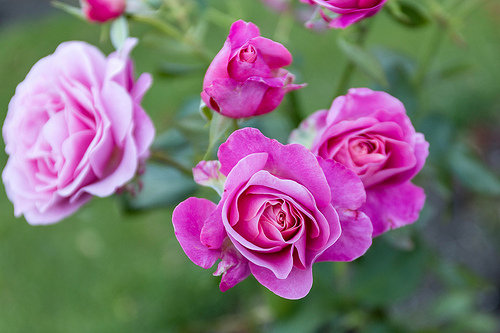

In [5]:
roses = list(data_dir.glob('roses/*'))
Image.open(roses[9])

In [7]:
img_height,img_width=180,180
batch_size=32
train_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
     

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


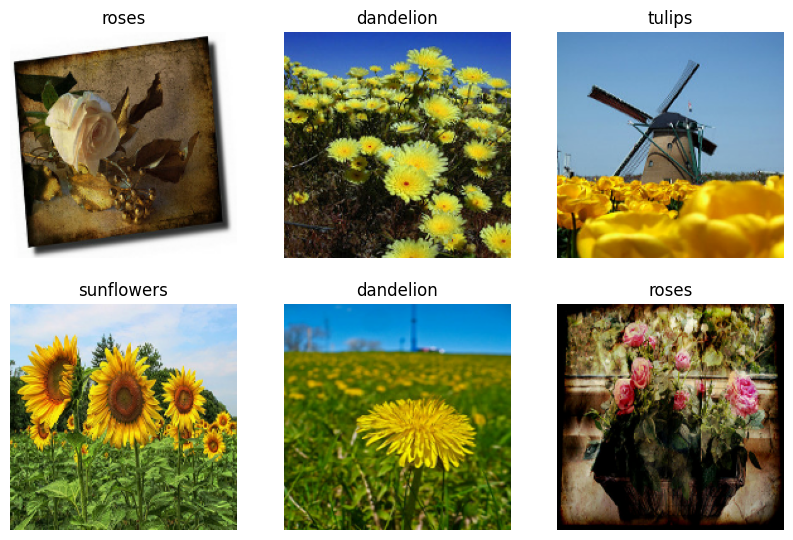

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
pre_trained = keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    # input_tensor=None,
    input_shape=(180, 180, 3),
    pooling='avg',
    classes=5,
    classifier_activation="softmax",
    name="resnet50v2",
)

for layer in pre_trained.layers:
        layer.trainable=False


transfer_model = Sequential([
        InputLayer(input_shape=(180, 180, 3)),
        pre_trained,

        Flatten(),
        Dense(512, activation='relu'),
        Dense(5, activation='softmax')

])

# transfer_model.add(pre_trained)
# transfer_model.add(Flatten())
# transfer_model.add(Dense(512, activation='relu'))
# transfer_model.add(Dense(5, activation='softmax'))


TypeError: The added layer must be an instance of class Layer. Found: <Functional name=resnet50v2, built=True>